In [5]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [6]:
import sys
import os

py_file_location = "/content/drive/My Drive/Colab Notebooks/Summer24Notebooks/forAnalysis"
sys.path.append(os.path.abspath(py_file_location))
os.chdir(py_file_location)
!ls

 5-26-23_T2_behavior.xls
'Daphnia_Behavior_Calculator - Sleap.ipynb'
'Daphnia_Behavior_Calculator - Sleap - Multianimal - tracking.ipynb'
 Figure1c.ipynb
 FreeSwimVid_behavior.xls
 FreeSwimVid.h5
 functions.py
 functions_SLEAP.py
 msd_rectangle_impenetrable.xlsx
 __pycache__
'Sleap Analysis.ipynb'
 sleapResources.py


In [7]:
import matplotlib.pyplot as plt
import functions_SLEAP as functions
import numpy as np
from IPython.display import display, HTML
#display(HTML("<style>.container { width:60% !important; }</style>"))
import cv2
import glob
import random

# Make sure there is only 6 instances

In [8]:
frameRate = 30 #Framerate of the Video
VideoDimension = [600,415] #read this vlaue of the top left in imageJ after cropping the video so that you mainly see the enclosure
enclosureMm = 40 #The length of pixels in mm
enclosurePixel = 180 #Number of pixels,pixel across

#The scale which is used to switch from pixel values to mm
scale = enclosureMm/enclosurePixel

first_part_of_name = "FreeSwimVid"

# the address of the analyzed daphnia h5 file
adress = first_part_of_name + ".h5"

#Filename that the data will get saved in
name = first_part_of_name +'_behavior.xls'

#middle_data = file(r"C:\Users\dasguptalab\Dasgupta Dropbox\Moumita Dasgupta\PC\Documents\Daphnia Research\Research\Summer Research 2023\Free_swimming\May 18\T1\5-18-23_DT1CROP.avi.predictions.000_5-18-23_DT1CROP.analysis.h5")
middle_data = functions.file(adress)

===filename===
FreeSwimVid.h5

===HDF5 datasets===
['edge_inds', 'edge_names', 'instance_scores', 'labels_path', 'node_names', 'point_scores', 'provenance', 'track_names', 'track_occupancy', 'tracking_scores', 'tracks', 'video_ind', 'video_path']

===locations data shape===
(1800, 1, 2, 1)

===nodes===
0: Center



In [9]:
data = functions.daphnia_data(middle_data)

In [10]:
#This functions filters the daphnia Data (Shouldnt be needed if we only have one daphnia)
x, y = functions.filters_sleap(data,VideoDimension[1])
print("There is", len(x[0]), "daphnia for video: ", adress)

#Finds the Mean Square Displacement of each of the individual tracks"
allmsd, avgallmsd, varallmsd = functions.msd(x[0], y[0])

#will give a warning if divided by 0 but should be ok! Finds the speed and direction based on position of the daphnia
speed, acc, direction, diffdirection = functions.velfinder(x[0],y[0])

There is 1 daphnia for video:  FreeSwimVid.h5


Trajectory of the Daphnia [ 0.0 , 60000.0 ] ms or [  0.0 , 60.0 ] s


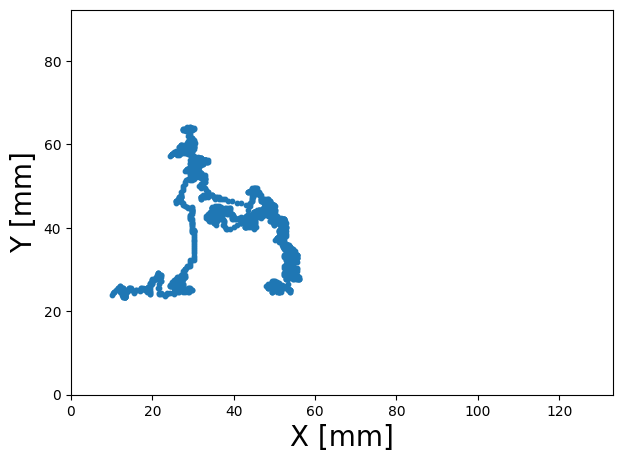

In [ ]:
#Plots the trajectory (it should look like the enclosure [if not change VideoDimensions]).
#The code adjust itself based on the videodimensions
#To look at one daphnia ex: x[0][0],y[0][0]....x[0][5],y[0]
functions.PlotTrajectory(x[0], y[0], [0, len(x[0][0])], VideoDimension, frameRate, scale)

In [11]:
minPrePostPeakSlope = 0.8 #Minimum value the speed value has to be different from its previous point or next point
minThreshold = 1.8 #Minimum Speed Value 1
#If this value is large it will group more power strokes into a bout
#(the time between power strokes can be larger while still being in the same bout
peak_together = 5

#Caluclating where the peaks are (power strokes)
#peaks grouped together in a bout
position_of_peaks, peaks, peak_displacement = functions.PowerStrokes(speed, acc,  minThreshold, minPrePostPeakSlope, peak_together)

#Putting the power strokes into bouts
power_strokes = functions.PowerStrokeBout(peaks, x[0], y[0], speed)

#Putting the post power strokes into bouts
post_power_strokes = functions.PostPowerStrokeBout(power_strokes, x[0], y[0], speed)

In [ ]:
peaks[0] #to look through different data peaks[0]....peaks[5]

[[7, 16, 3],
 [23, 32, 3],
 [38, 42, 3],
 [52, 52, 1],
 [58, 69, 4],
 [75, 91, 6],
 [99, 107, 3],
 [113, 113, 1],
 [120, 120, 1],
 [129, 129, 1],
 [135, 141, 3],
 [147, 162, 5],
 [170, 185, 5],
 [196, 199, 2],
 [207, 209, 2],
 [221, 227, 3],
 [233, 247, 6],
 [254, 254, 1],
 [262, 293, 11],
 [302, 302, 1],
 [310, 316, 3],
 [324, 324, 1],
 [337, 357, 8],
 [363, 367, 3],
 [375, 398, 8],
 [406, 406, 1],
 [414, 424, 3],
 [430, 444, 7],
 [452, 484, 9],
 [496, 521, 12],
 [539, 556, 8],
 [565, 565, 1],
 [573, 582, 4],
 [590, 595, 3],
 [601, 608, 3],
 [614, 614, 1],
 [625, 668, 16],
 [677, 699, 9],
 [709, 714, 2],
 [724, 729, 3],
 [736, 739, 2],
 [746, 784, 14],
 [791, 810, 7],
 [816, 837, 8],
 [845, 852, 4],
 [871, 881, 5],
 [891, 895, 3],
 [911, 918, 3],
 [928, 932, 2],
 [939, 941, 2],
 [951, 975, 10],
 [982, 992, 4],
 [999, 1006, 3],
 [1012, 1033, 8],
 [1040, 1040, 1],
 [1047, 1079, 10],
 [1086, 1113, 8],
 [1120, 1123, 2],
 [1135, 1140, 3],
 [1147, 1147, 1],
 [1155, 1174, 7],
 [1184, 1184, 1

In [ ]:
len(power_strokes[0])

94

In [ ]:
for ps in power_strokes[0]:
    print(ps)

[6, 17, 3, 1.1370079629525047, -4.300872802734375, -3.782623291015625, 0.5360437051701978, 3.965850830078125, 6.655426025390625, 10.685005682483595]
[22, 33, 3, -0.6456025354073015, 4.190032958984375, -6.4901123046875, 0.5292086808483023, 6.3173370361328125, 10.126708984375, 14.597548610019492]
[37, 43, 3, -0.018050237960435225, -0.0982666015625, 5.444061279296875, 0.6174066041236977, 5.6658935546875, 2.505157470703125, 8.819063544954869]
[51, 53, 1, -60.16461232604374, 2.308868408203125, -0.0383758544921875, 0.9976250297796929, 0.0577545166015625, 0.288543701171875, 2.3146846170221425]
[57, 70, 4, 1.552306896866351, 2.336395263671875, 1.5051116943359375, 0.16433151116287734, 4.074737548828125, 12.502593994140625, 16.912320822403245]
[74, 92, 6, -0.6036226010419721, -5.874755859375, 9.732498168945312, 0.40410912127912707, 12.676422119140625, 18.523406982421875, 28.13132613248711]
[98, 108, 3, -1.6968510926423654, 6.27130126953125, -3.6958465576171875, 0.5951390929352058, 4.053268432617

In [ ]:
print(len(post_power_strokes[0]))

95


In [ ]:
for ps in post_power_strokes[0]:
    print(ps)

[0, 6, 6, 3.656849282181783, -5.810638427734375, -1.5889739990234375, 0.7507907565776785, 6.7357177734375, 16.61273193359375, 22.527749426908045]
[18, 21, 3, 3.656849282181783, -5.810638427734375, -1.5889739990234375, 0.7507907565776785, 6.7357177734375, 16.61273193359375, 22.527749426908045]
[34, 36, 2, 0.5480848828323994, 2.101348876953125, 3.833984375, 0.9509383737258531, 1.615142822265625, 1.69610595703125, 4.597650469317505]
[44, 50, 6, 2.164677520669575, -3.89117431640625, -1.797576904296875, 0.5562042348331663, 1.79595947265625, 5.3265380859375, 7.7063739039313655]
[54, 56, 2, 22.66866679167448, -1.84466552734375, -0.0813751220703125, 0.9987623496770546, 0.028106689453125, 0.119537353515625, 1.8487476391605862]
[71, 73, 2, -1.306590833726901, 1.98406982421875, -1.5185089111328125, 0.7674591045790405, 1.4585723876953125, 0.202056884765625, 3.2555220195244363]
[93, 97, 4, 0.9704308164880001, -1.908966064453125, -1.967132568359375, 0.7555115349800561, 1.7937469482421875, 1.80014038

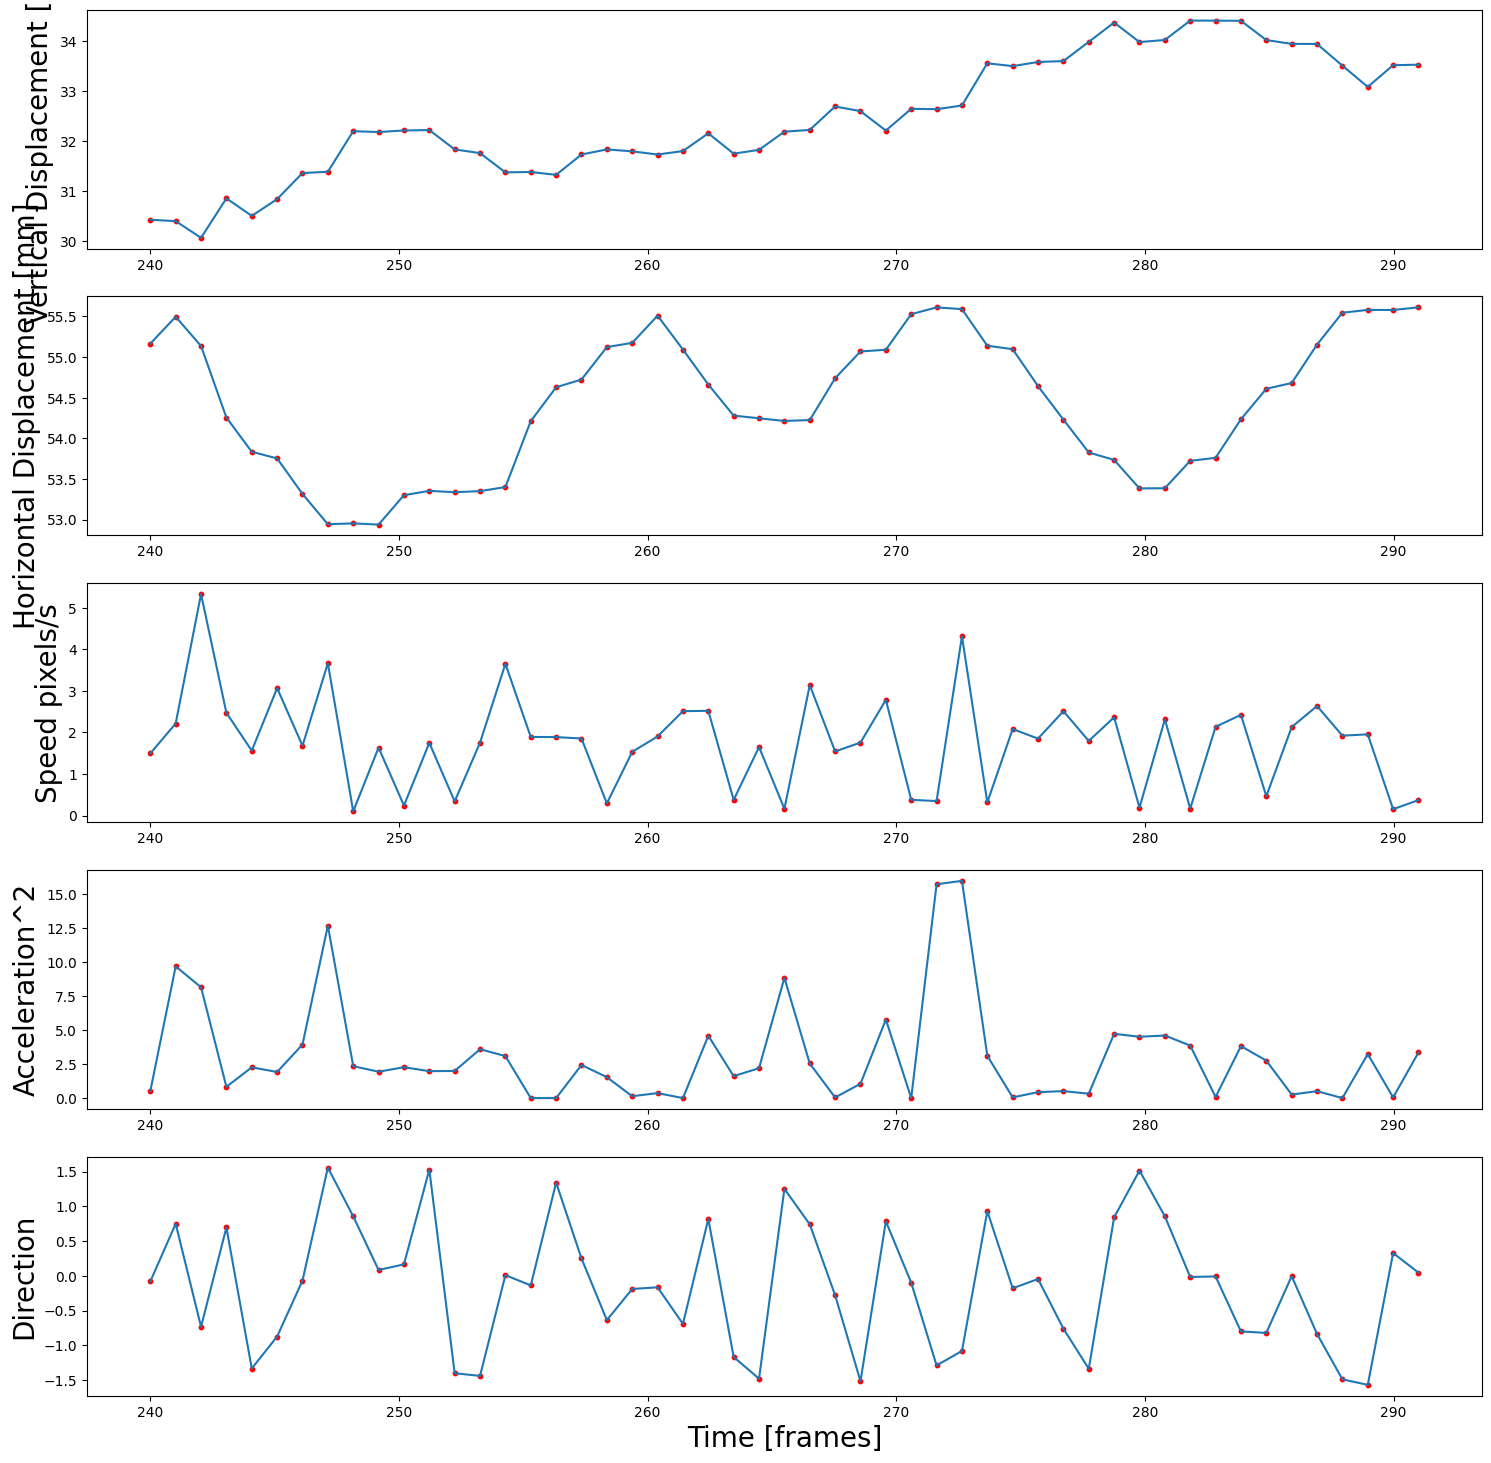

In [ ]:
#To see different motion profiles for different daphnia change first parameter
functions.PlotData(0, [240, 291], x[0], y[0], speed, acc, direction, diffdirection, scale, VideoDimension)

In [ ]:
#Saving the data
!pip install xlwt


In [ ]:

accThreshold = 0 #Ignore this value we dont use it
functions.SafeDataAnalysis(x[0], y[0],allmsd,direction, speed, acc, power_strokes, post_power_strokes[1:], peak_displacement, minPrePostPeakSlope, minThreshold, accThreshold, frameRate,enclosurePixel, enclosureMm, scale, name,peak_together)